# FOBSS Dataset
---
This notebook should supply a brief introduction into the battery dataset provided in [1]. The data was conducted on a battery system with several battery packs each monitored by a subunit of the Battery Management System (BMS). They monitored the current, voltage and temperature during several charge, discharge and rest procedures called profiles.

## Experimental Setup
The system is divided into three different units. The Inverter is responsible to charge and discharge the battery. The BMS monitors the battery through the BMS master and several slaves. The master measures the overall system state while each slaves is responsible for one battery pack and the cells within.
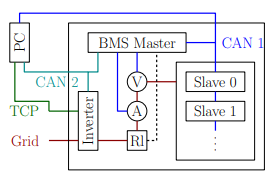
The table below provides detailed information on the measurement frequencies and precision:
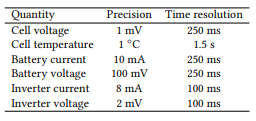

## Plots
The plots below illustrate the measured data during one profile run (profile_-10A_25A_19_11_18). The procedure was as follows:
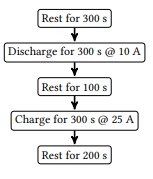

[1] https://dl.acm.org/doi/abs/10.1145/3307772.3331020

In [1]:
# library imports
import numpy as np
import matplotlib.pyplot as plt

### Inverter
The currrent and voltage was measured at the inverter with values varying in [-90 A, 90 A] and [0 V, 500 V]. The maximum power is 15kW. 
- positive current: battery is charged
- negative current: batter is discharged

In [2]:
# load inverter data
cur_inv = np.loadtxt('../../data/raw/fobss_data/data/profile_-10A_25A_19_11_18/inverter/Inverter_Current.csv', delimiter=';')
volt_inv = np.loadtxt('../../data/raw/fobss_data/data/profile_-10A_25A_19_11_18/inverter/Inverter_Voltage.csv', delimiter=';')

Text(0.5, 0.98, 'Inverter Current')

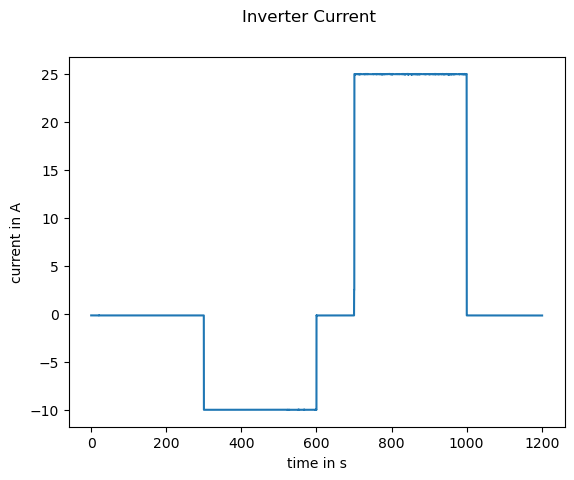

In [3]:
# normalize CAN time and plot graph
cur_inv = cur_inv - [cur_inv[0,0],0]
plt.plot(cur_inv[:,0], cur_inv[:,1])
plt.xlabel('time in s')
plt.ylabel('current in A')
plt.suptitle('Inverter Current')

Text(0.5, 0.98, 'Inverter Voltage')

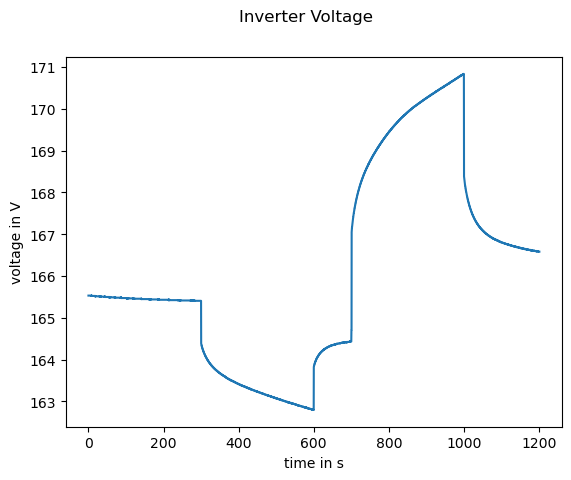

In [4]:
# normalize CAN time and plot graph
volt_inv = volt_inv - [volt_inv[0,0],0]
plt.plot(volt_inv[:,0], volt_inv[:,1])
plt.xlabel('time in s')
plt.ylabel('voltage in V')
plt.suptitle('Inverter Voltage')

### Battery master
Two sensors measured the overall current and voltage.

In [5]:
# load battery data
cur_bat = np.loadtxt('../../data/raw/fobss_data/data/profile_-10A_25A_19_11_18/battery/Battery_Current.csv', delimiter=';')
volt_bat = np.loadtxt('../../data/raw/fobss_data/data/profile_-10A_25A_19_11_18/battery/Battery_Voltage.csv', delimiter=';')

Text(0.5, 0.98, 'Battery Current')

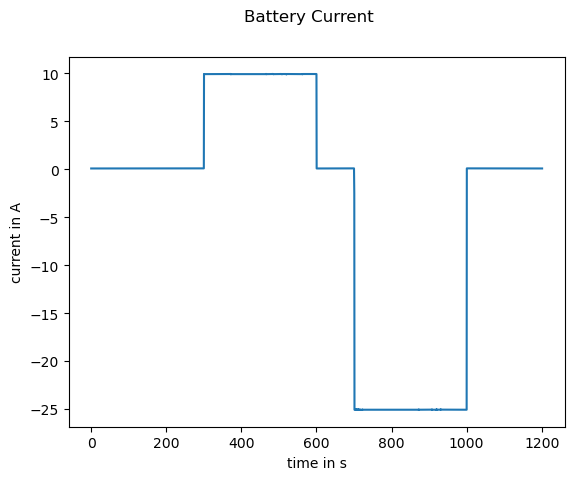

In [6]:
# normalize CAN time and plot graph
cur_bat = cur_bat - [cur_bat[0,0],0]
plt.plot(cur_bat[:,0], cur_bat[:,1])
plt.xlabel('time in s')
plt.ylabel('current in A')
plt.suptitle('Battery Current')

Text(0.5, 0.98, 'Battery Voltage')

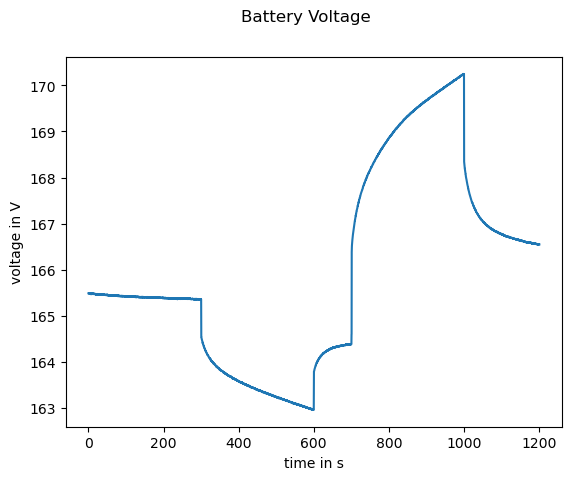

In [7]:
# normalize CAN time and plot graph
volt_bat = volt_bat - [volt_bat[0,0],0]
plt.plot(volt_bat[:,0], volt_bat[:,1])
plt.xlabel('time in s')
plt.ylabel('voltage in V')
plt.suptitle('Battery Voltage')

### Battery slaves
The slaves are measuring the temperature and voltage of each battery pack hence there are 4. Since each pack contains 11 cells each slaves logs the two parameters for each of those. For simplicity the following plots only contain one value for each pack that represents the average over all 11 cells.

In [8]:
# load cell temperature data
temp_slave_0 = np.loadtxt('../../data/raw/fobss_data/data/profile_-10A_25A_19_11_18/cells/Slave_0_Cell_Temperatures.csv', delimiter=';')
temp_slave_1 = np.loadtxt('../../data/raw/fobss_data/data/profile_-10A_25A_19_11_18/cells/Slave_1_Cell_Temperatures.csv', delimiter=';')
temp_slave_2 = np.loadtxt('../../data/raw/fobss_data/data/profile_-10A_25A_19_11_18/cells/Slave_2_Cell_Temperatures.csv', delimiter=';')
temp_slave_3 = np.loadtxt('../../data/raw/fobss_data/data/profile_-10A_25A_19_11_18/cells/Slave_3_Cell_Temperatures.csv', delimiter=';')

In [9]:
# compute average temperatures for each slave
temp_slave_0 = np.column_stack((temp_slave_0[:,0], np.mean(temp_slave_0[:, 1:temp_slave_0.shape[1]], axis=1)))
temp_slave_1 = np.column_stack((temp_slave_1[:,0], np.mean(temp_slave_1[:, 1:temp_slave_1.shape[1]], axis=1)))
temp_slave_2 = np.column_stack((temp_slave_2[:,0], np.mean(temp_slave_2[:, 1:temp_slave_2.shape[1]], axis=1)))
temp_slave_3 = np.column_stack((temp_slave_3[:,0], np.mean(temp_slave_3[:, 1:temp_slave_3.shape[1]], axis=1)))

Text(0.5, 0.98, 'Average Cell Temperature')

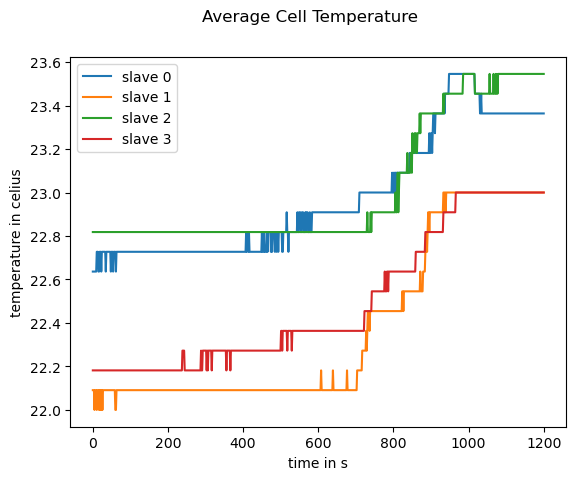

In [10]:
# normalize CAN time and plot graph
temp_slave_0 = temp_slave_0 - [temp_slave_0[0,0],0]
temp_slave_1 = temp_slave_1 - [temp_slave_1[0,0],0]
temp_slave_2 = temp_slave_2 - [temp_slave_2[0,0],0]
temp_slave_3 = temp_slave_3 - [temp_slave_3[0,0],0]
plt.plot(temp_slave_0[:,0], temp_slave_0[:,1], label="slave 0")
plt.plot(temp_slave_1[:,0], temp_slave_1[:,1], label="slave 1")
plt.plot(temp_slave_2[:,0], temp_slave_2[:,1], label="slave 2")
plt.plot(temp_slave_3[:,0], temp_slave_3[:,1], label="slave 3")
plt.legend()
plt.xlabel('time in s')
plt.ylabel('temperature in celius')
plt.suptitle('Average Cell Temperature')

In [11]:
# load cell voltage data
volt_slave_0 = np.loadtxt('../../data/raw/fobss_data/data/profile_-10A_25A_19_11_18/cells/Slave_0_Cell_Voltages.csv', delimiter=';')
volt_slave_1 = np.loadtxt('../../data/raw/fobss_data/data/profile_-10A_25A_19_11_18/cells/Slave_1_Cell_Voltages.csv', delimiter=';')
volt_slave_2 = np.loadtxt('../../data/raw/fobss_data/data/profile_-10A_25A_19_11_18/cells/Slave_2_Cell_Voltages.csv', delimiter=';')
volt_slave_3 = np.loadtxt('../../data/raw/fobss_data/data/profile_-10A_25A_19_11_18/cells/Slave_3_Cell_Voltages.csv', delimiter=';')

In [12]:
# compute average temperatures for each slave
volt_slave_0 = np.column_stack((volt_slave_0[:,0], np.mean(volt_slave_0[:, 1:volt_slave_0.shape[1]], axis=1)))
volt_slave_1 = np.column_stack((volt_slave_1[:,0], np.mean(volt_slave_1[:, 1:volt_slave_1.shape[1]], axis=1)))
volt_slave_2 = np.column_stack((volt_slave_2[:,0], np.mean(volt_slave_2[:, 1:volt_slave_2.shape[1]], axis=1)))
volt_slave_3 = np.column_stack((volt_slave_3[:,0], np.mean(volt_slave_3[:, 1:volt_slave_3.shape[1]], axis=1)))

Text(0.5, 0.98, 'Average Cell Voltage')

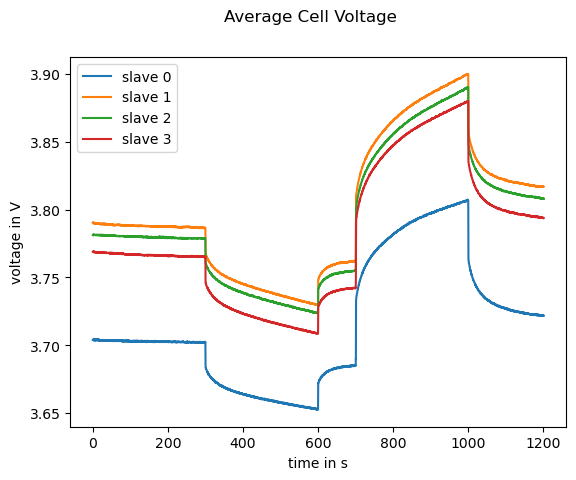

In [13]:
# normalize CAN time and plot graph
volt_slave_0 = volt_slave_0 - [volt_slave_0[0,0],0]
volt_slave_1 = volt_slave_1 - [volt_slave_1[0,0],0]
volt_slave_2 = volt_slave_2 - [volt_slave_2[0,0],0]
volt_slave_3 = volt_slave_3 - [volt_slave_3[0,0],0]
plt.plot(volt_slave_0[:,0], volt_slave_0[:,1], label="slave 0")
plt.plot(volt_slave_1[:,0], volt_slave_1[:,1], label="slave 1")
plt.plot(volt_slave_2[:,0], volt_slave_2[:,1], label="slave 2")
plt.plot(volt_slave_3[:,0], volt_slave_3[:,1], label="slave 3")
plt.legend()
plt.xlabel('time in s')
plt.ylabel('voltage in V')
plt.suptitle('Average Cell Voltage')